In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectKBest, chi2



In [3]:
# Load the dataset
file_path = 'ObesityDataSet.csv'
data = pd.read_csv(file_path)



In [4]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
# Identify categorical columns and apply Label Encoding
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

print("\nCategorical Columns:", list(categorical_columns))

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"Encoded '{col}' with classes: {le.classes_}")





Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Encoded 'Gender' with classes: ['Female' 'Male']
Encoded 'family_history_with_overweight' with classes: ['no' 'yes']
Encoded 'FAVC' with classes: ['no' 'yes']
Encoded 'CAEC' with classes: ['Always' 'Frequently' 'Sometimes' 'no']
Encoded 'SMOKE' with classes: ['no' 'yes']
Encoded 'SCC' with classes: ['no' 'yes']
Encoded 'CALC' with classes: ['Always' 'Frequently' 'Sometimes' 'no']
Encoded 'MTRANS' with classes: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
Encoded 'NObeyesdad' with classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [7]:
print(data.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [8]:
# Separate features (X) and the target variable (y)
X = data.drop('NObeyesdad', axis=1)  # Assuming 'NObeyesdad' is the target variable
y = data['NObeyesdad']

# Calculate Mutual Information Scores
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)



Mutual Information Scores:
                           Feature  MI Score
3                           Weight  1.246523
1                              Age  0.597183
2                           Height  0.423651
6                             FCVC  0.400032
12                             FAF  0.303809
10                            CH2O  0.289712
13                             TUE  0.280467
7                              NCP  0.258365
0                           Gender  0.203210
8                             CAEC  0.163655
4   family_history_with_overweight  0.150755
14                            CALC  0.095704
5                             FAVC  0.080598
15                          MTRANS  0.062689
11                             SCC  0.018273
9                            SMOKE  0.000000


In [2]:
# # Apply Variance Threshold
# sel = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
# X_variance = sel.fit_transform(X)

# selected_features_variance = X.columns[sel.get_support()]
# print("\nSelected Features after Variance Threshold:")
# print(selected_features_variance)


In [4]:
# # Apply Chi-Square Test
# k_best = SelectKBest(chi2, k='all')
# X_best = k_best.fit_transform(X, y)

# chi2_scores = k_best.scores_
# chi2_scores_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Chi2 Score': chi2_scores
# }).sort_values(by='Chi2 Score', ascending=False)

# print("\nChi2 Scores:")
# print(chi2_scores_df)


In [11]:
# Dropping less important features based on analysis
features_to_drop = ['SMOKE', 'SCC', 'MTRANS', 'FAVC', 'CALC', 'TUE', 'FAF', 'CH2O', 'CAEC', 'NCP', 'FCVC', 'family_history_with_overweight']
X_reduced = X.drop(columns=features_to_drop)

print("\nReduced Feature Columns:", list(X_reduced.columns))

# Feature Scaling (optional but recommended for Decision Tree)
scaler = StandardScaler()
X_scaled_reduced = scaler.fit_transform(X_reduced)



Reduced Feature Columns: ['Gender', 'Age', 'Height', 'Weight']


In [12]:
# Train-Test Split with reduced feature set
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_scaled_reduced, y, test_size=0.2, random_state=42
)

print("\nTraining Set Size with Reduced Features:", X_train_reduced.shape)
print("Testing Set Size with Reduced Features:", X_test_reduced.shape)

# Train the Decision Tree Classifier with reduced features
clf_reduced = DecisionTreeClassifier(random_state=42)
clf_reduced.fit(X_train_reduced, y_train)



Training Set Size with Reduced Features: (1688, 4)
Testing Set Size with Reduced Features: (423, 4)


DecisionTreeClassifier(random_state=42)

In [13]:
# Predictions on the test set with reduced features
y_pred_reduced = clf_reduced.predict(X_test_reduced)

# Accuracy
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"\nAccuracy with reduced features: {accuracy_reduced:.2f}")




Accuracy with reduced features: 0.96


In [14]:
# Classification Report
print("\nClassification Report with reduced features:")
print(classification_report(y_test, y_pred_reduced))


Classification Report with reduced features:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.97      0.90      0.93        62
           2       0.96      0.95      0.95        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      0.95      0.94        56
           6       0.92      0.94      0.93        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423



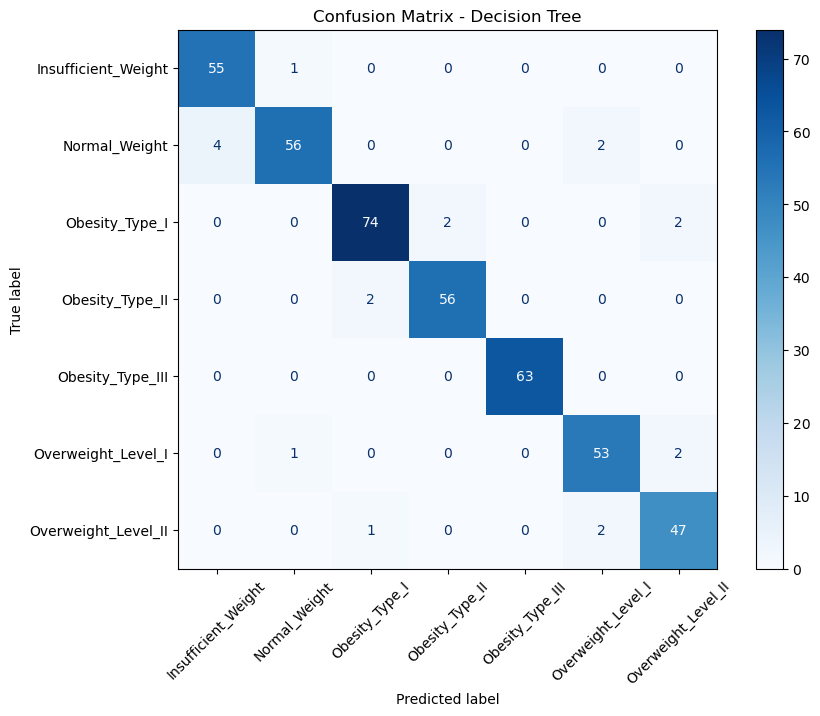

In [15]:
# Generate the confusion matrix
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_reduced, display_labels=label_encoders['NObeyesdad'].classes_)

# Plot with adjusted figure size and rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 7))  # Increase figure size
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)  # Rotate x-axis labels

plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [16]:
# Perform 5-fold cross-validation using the already defined model clf_reduced
cv_scores = cross_val_score(clf_reduced, X_scaled_reduced, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())


Cross-Validation Scores:  [0.90307329 0.97156398 0.95734597 0.96208531 0.9549763 ]
Mean Cross-Validation Score:  0.9498089700066105


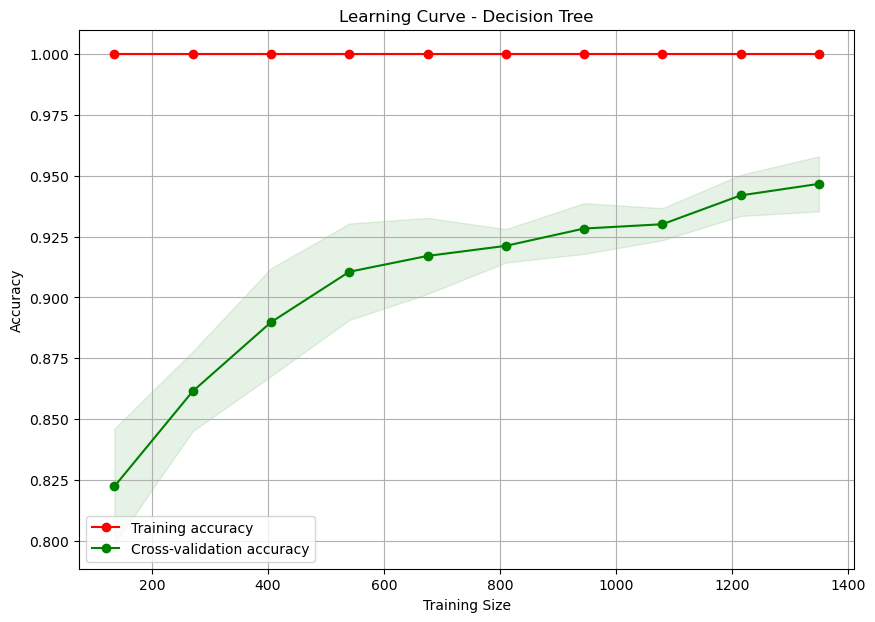

In [17]:
#Train-Test Accuracy Graph
# Define the range of training sizes
train_sizes, train_scores, test_scores = learning_curve(
    clf_reduced, X_train_reduced, y_train, cv=5, 
    scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.title("Learning Curve - Decision Tree")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

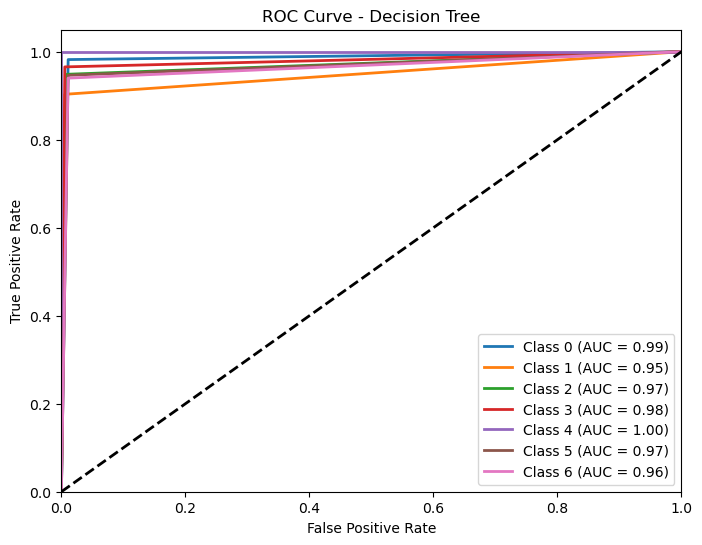

In [18]:
# Compute ROC curve and ROC area for each class
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]
y_score_reduced = clf_reduced.predict_proba(X_test_reduced)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_reduced[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


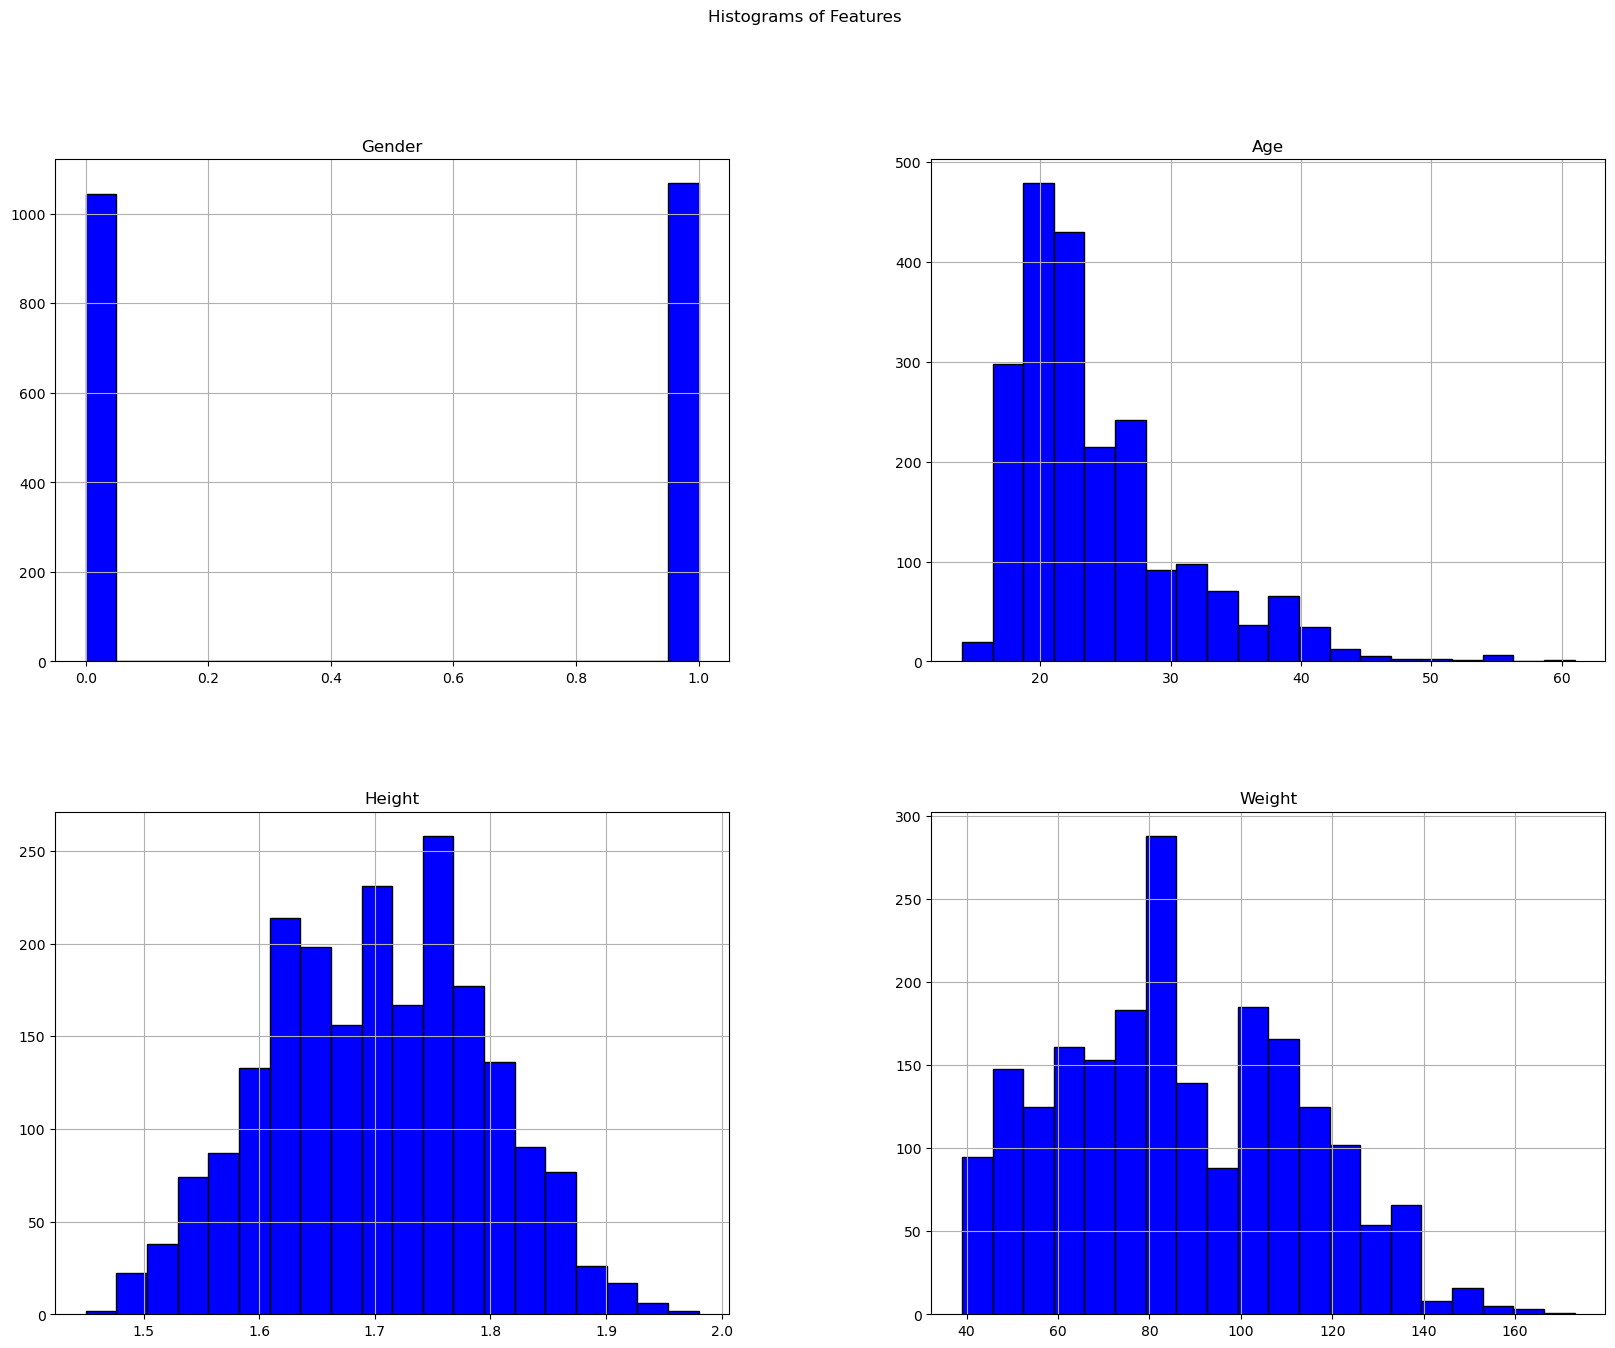

In [19]:
# Plot histograms for each numerical feature
X_reduced_df = pd.DataFrame(X_reduced, columns=X_reduced.columns)
X_reduced_df.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

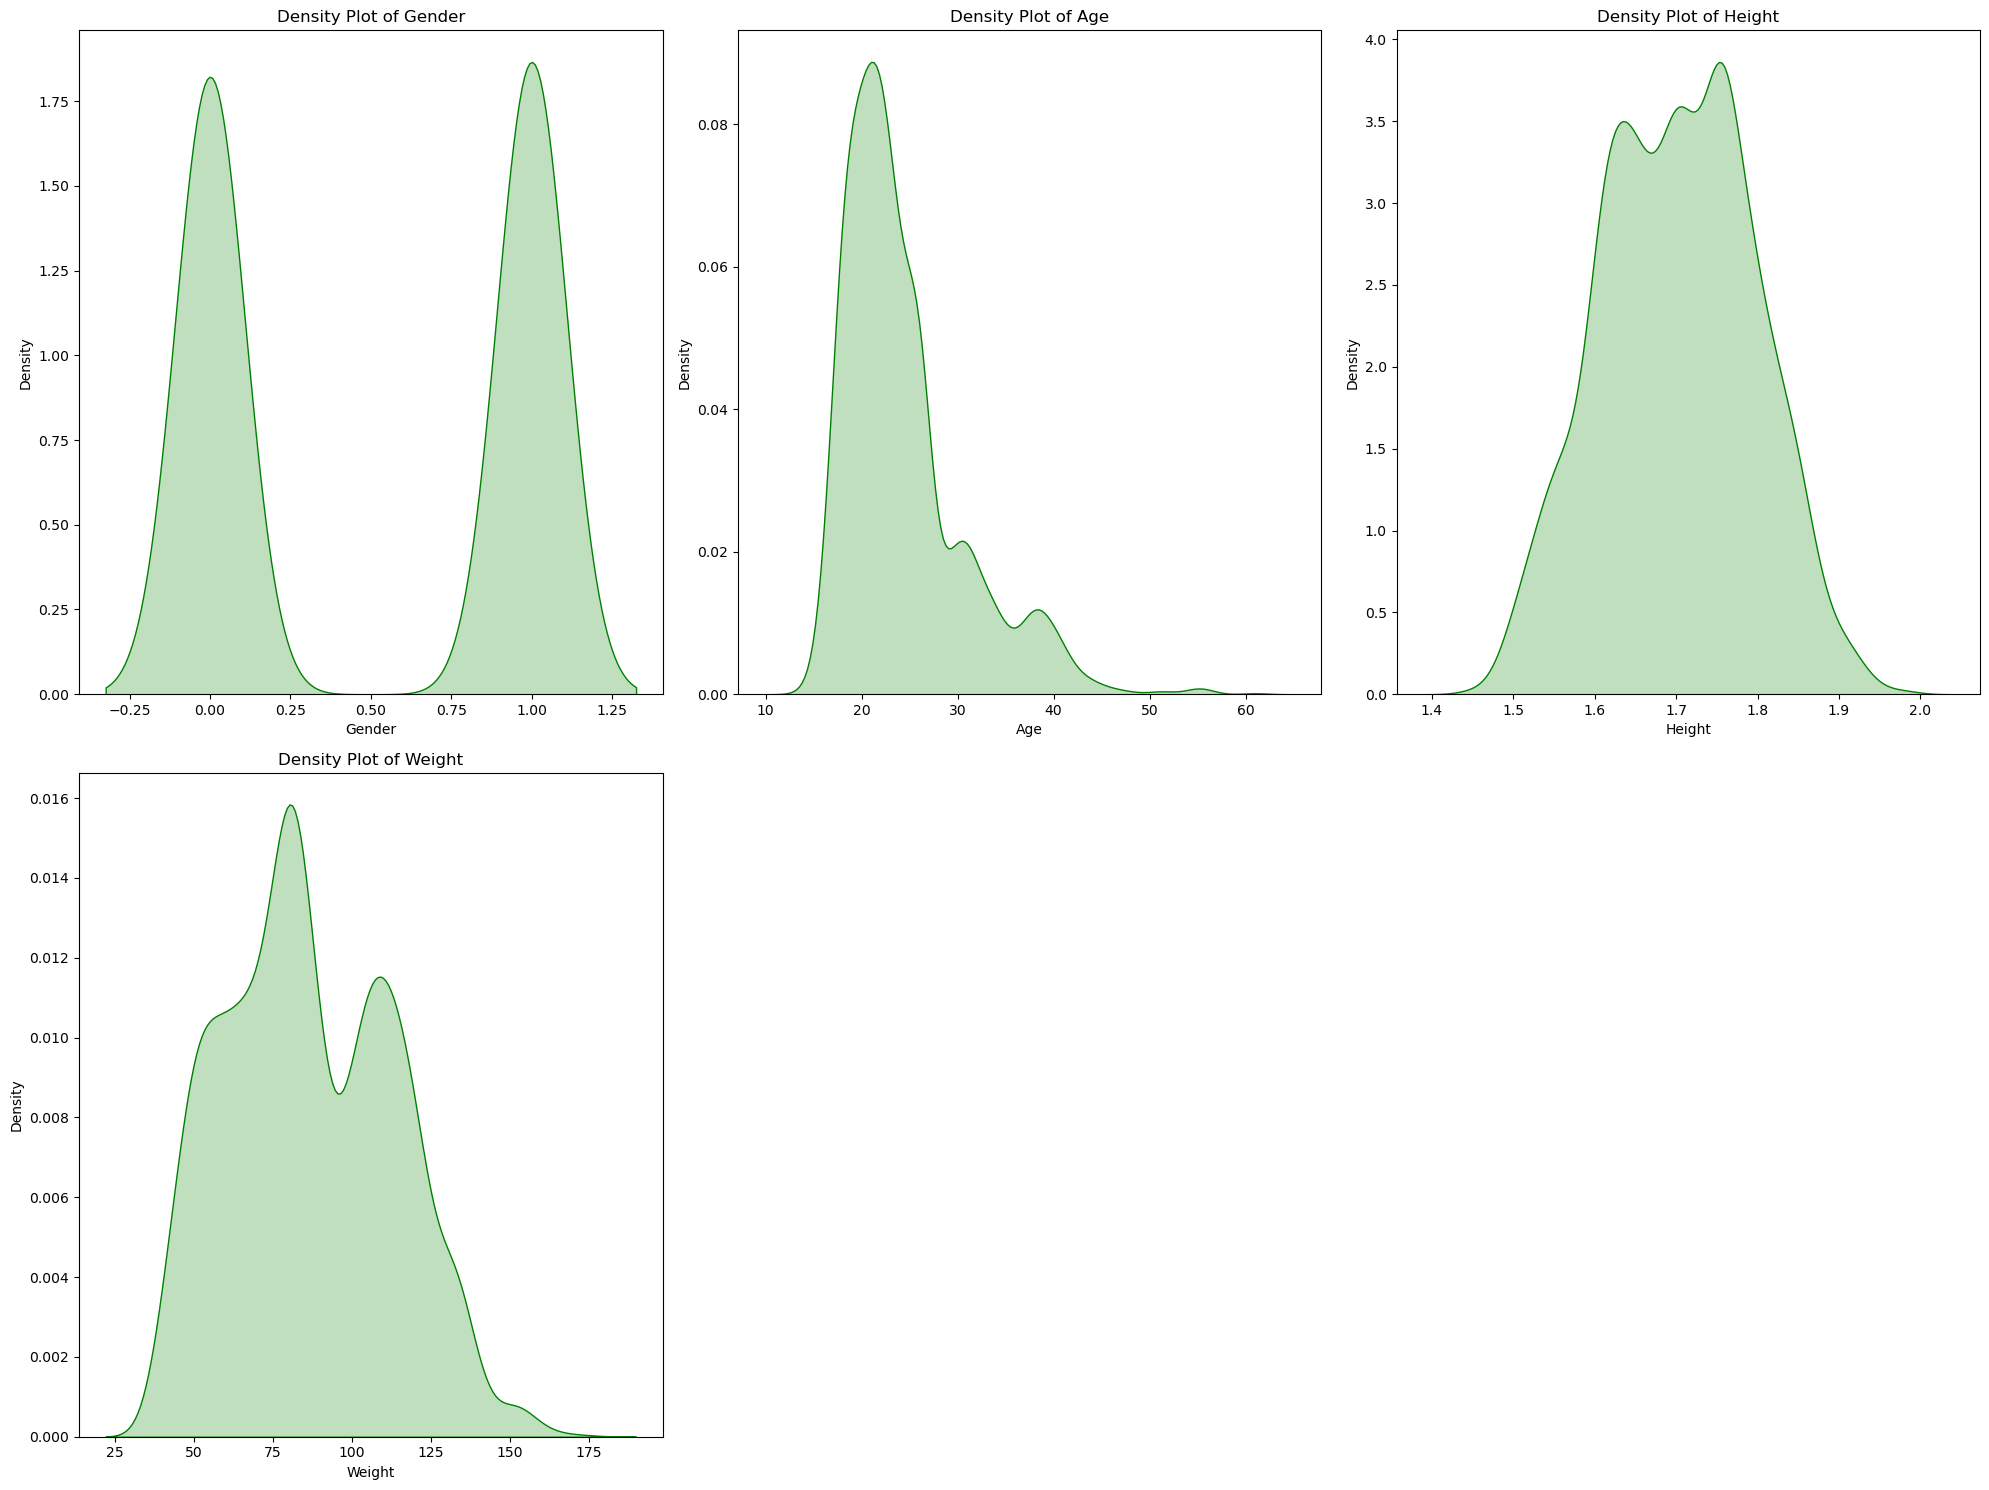

In [20]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(20, 15))
for i, col in enumerate(X_reduced_df.columns):
    plt.subplot(len(X_reduced_df.columns)//3 + 1, 3, i + 1)
    sns.kdeplot(X_reduced_df[col], shade=True, color="g")
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

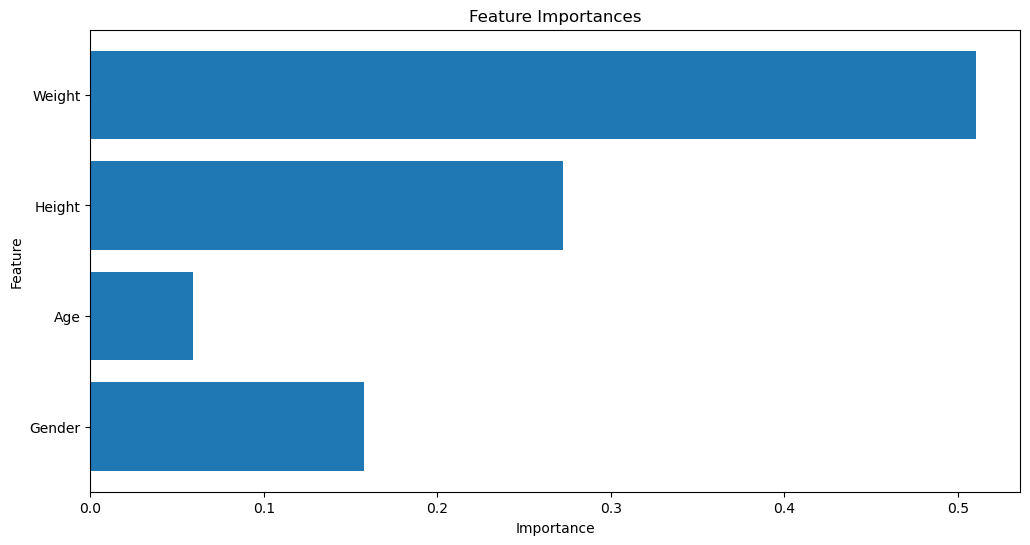

In [21]:
# Get feature importances from the trained decision tree
importances = clf_reduced.feature_importances_

# Create a bar plot of the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(X_reduced.columns, importances, align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()